# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def truncate_colormap(cmap_name, minval=0.3, maxval=1.0, n=100, return_cmap=True):
    """Return a truncated version of a colormap."""
    cmap = plt.get_cmap(cmap_name)
    if return_cmap:
        new_cmap = colors.LinearSegmentedColormap.from_list(
            f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
            cmap(np.linspace(minval, maxval, n))
        )
        return new_cmap
    else:
        return cmap(np.linspace(minval, maxval, n))


# Read data

In [2]:
events = pd.read_csv('data/spond__events.csv')
exchange_rates = pd.read_csv('data/spond__exchange_rates.csv')
memberships = pd.read_csv('data/spond__memberships.csv')
teams = pd.read_csv('data/spond__teams.csv')
payments = pd.read_csv('data/spond_payments.csv')

In [3]:
events.columns.to_list()

['event_id',
 'team_id',
 'event_start',
 'event_end',
 'latitude',
 'longitude',
 'created_at']

In [4]:
exchange_rates.columns.to_list()

['date', 'currency', 'exchange_rate']

In [5]:
memberships.columns.to_list()

['membership_id', 'group_id', 'role_title', 'joined_at']

In [6]:
teams.columns.to_list()

['team_id', 'team_activity', 'country_code', 'created_at']

In [7]:
payments.columns.to_list()

['payment_id',
 'membership_id',
 'team_id',
 'currency',
 'volume_local_currency',
 'created_at']

# Cleaning

### events

In [8]:
events.isna().sum()

event_id           0
team_id            0
event_start        0
event_end          0
latitude       38517
longitude      38517
created_at         0
dtype: int64

In [9]:
events.dtypes

event_id        object
team_id         object
event_start     object
event_end       object
latitude       float64
longitude      float64
created_at      object
dtype: object

In [10]:
events.event_id.value_counts().max()

1

In [11]:
events['event_start'] = pd.to_datetime(events.event_start)
events['event_end'] = pd.to_datetime(events.event_end)
events['created_at'] = pd.to_datetime(events.created_at)

### exchange_rates

In [12]:
exchange_rates.isna().sum()

date             0
currency         0
exchange_rate    0
dtype: int64

In [13]:
exchange_rates['date'] = pd.to_datetime(exchange_rates.date).dt.date


In [14]:
exchange_rates.date

0        2024-01-01
1        2024-01-01
2        2024-01-01
3        2024-01-01
4        2024-01-01
            ...    
59287    2024-12-31
59288    2024-12-31
59289    2024-12-31
59290    2024-12-31
59291    2024-12-31
Name: date, Length: 59292, dtype: object

### memberships

In [15]:
memberships.isna().sum()

membership_id    0
group_id         0
role_title       0
joined_at        0
dtype: int64

In [16]:
memberships.membership_id.value_counts().max()

1

In [17]:
memberships.role_title.value_counts()

member    175541
admin      19887
Name: role_title, dtype: int64

In [18]:
memberships['joined_at'] = pd.to_datetime(memberships.joined_at)

### teams

In [19]:
teams.isna().sum()

team_id          0
team_activity    0
country_code     0
created_at       0
dtype: int64

In [20]:
teams.team_id.value_counts().max()

1

In [21]:
teams.team_activity.value_counts()

football             1800
cricket               355
netball               240
rugby                 163
basketball            163
gymnastics            101
other_non_sports      100
dancing_and_cheer      79
pickleball             79
volleyball             79
other_sports           78
social                 77
handball               72
field_hockey           71
music                  63
school                 56
tennis                 50
cycling                43
ice_hockey             38
badminton              37
martial_arts           36
multisport             33
volunteering           32
running                28
scouting               24
swimming               23
golf                   20
water_sports           20
padel                  20
rowing                 16
baseball               14
squash                 14
pingpong               14
softball               13
athletics              12
american_football      11
esports                11
shooting_sports        10
alpine_skiin

In [22]:
teams['created_at'] = pd.to_datetime(teams.created_at)

In [23]:
teams.created_at.describe(datetime_is_numeric=True)

count                                   4182
mean     2024-06-20 19:04:21.240107520+00:00
min         2024-01-01 10:14:57.650000+00:00
25%      2024-04-09 11:17:32.017499904+00:00
50%      2024-06-25 09:29:55.904999936+00:00
75%      2024-08-30 19:26:26.166749952+00:00
max         2024-12-31 17:12:40.931000+00:00
Name: created_at, dtype: object

### payments

In [24]:
payments.isna().sum()

payment_id                 0
membership_id            625
team_id                    0
currency                   0
volume_local_currency      0
created_at                 0
dtype: int64

In [25]:
payments.dtypes

payment_id                object
membership_id             object
team_id                   object
currency                  object
volume_local_currency    float64
created_at                object
dtype: object

In [26]:
payments['created_at'] = pd.to_datetime(payments.created_at)
payments['created_date'] = payments.created_at.dt.date

In [27]:
payments.loc[payments.membership_id.isna()]

,payment_id,membership_id,team_id,currency,volume_local_currency,created_at,created_date
574,74CBE24F627119FD1583638523AC426A,NaN,4993AE4FAC6C4C88B5A891B38A853247,GBP,7.39,2024-12-04 06:42:10.694000+00:00,2024-12-04
2023,A29A8341DAD216C5CBF4C19489F3B79B,NaN,91D7B2A152E84A02A41D3D0C2A644FBD,GBP,3.80,2024-07-13 16:57:05.121000+00:00,2024-07-13
2534,8ADE9DFE5759ACA4D37C7603772FD8AF,NaN,401D258DD81C4BF697FFF288CF302146,NOK,258.00,2024-11-30 16:05:41.310000+00:00,2024-11-30
2764,19842770983B32EE877554FE7298CB30,NaN,623F4D25C1E743CF8F3697D5CFC8844A,GBP,2.50,2024-07-15 19:06:27.477000+00:00,2024-07-15
2828,8A8827CCF4B9A7FF99391B6D733D3302,NaN,78D16F81636A4BBCB4FD1B7C127AAD12,GBP,10.47,2024-02-13 19:44:49.446000+00:00,2024-02-13
...,...,...,...,...,...,...,...
247306,3C60874D7657FBBF91EA0FC098799FCA,NaN,5219700E36D240D8B251B839C8C1A1C2,GBP,4.00,2024-06-19 19:04:51.517000+00:00,2024-06-19
248699,29A25547535B742DA7A5B67B3B13DFA6,NaN,8C76ED24B33444ECBD01FC074559A773,NOK,310.00,2024-11-16 15:31:55.691000+00:00,2024-11-16
249226,01354F5FEE92BBD78C19EF2BFF9CD99E,NaN,FC42B5B0D0964C059AC9753E07CD0DD4,NOK,100.00,2024-10-07 21:12:01.955000+00:00,2024-10-07
249854,B5F9B83D253C5AAF37A4DF45B095FCE5,NaN,8508F45289E54B18BEFA6F1635AC6335,NOK,1028.00,2024-12-03 21:02:10.414000+00:00,2024-12-03


In [28]:
payments.volume_local_currency.describe()

count    250841.000000
mean         54.325822
std         266.624717
min           2.000000
25%           4.500000
50%           6.360000
75%          15.590000
max       10341.230000
Name: volume_local_currency, dtype: float64

In [29]:
payments.loc[payments.volume_local_currency==payments.volume_local_currency.max()]

,payment_id,membership_id,team_id,currency,volume_local_currency,created_at,created_date
17940,C600345CD549C3E57A2129E963A61D15,63c4e051ca0572266d95ce9c75e92295baeca8bb25b154...,73DF87F0EB3E4553B20DE09DC16297F4,USD,10341.23,2024-02-02 15:18:04.146000+00:00,2024-02-02
192246,99ED183CC0450E2111B632B0F74D2038,63c4e051ca0572266d95ce9c75e92295baeca8bb25b154...,73DF87F0EB3E4553B20DE09DC16297F4,USD,10341.23,2024-02-02 15:16:22.098000+00:00,2024-02-02


In [30]:
payments.groupby('currency')['volume_local_currency'].agg(['mean', 'min', 'max'])

,mean,min,max
currency,,,
AUD,74.220000,74.22,74.22
DKK,246.833333,105.00,956.00
EUR,64.260404,2.00,461.75
GBP,11.316496,2.00,500.00
NOK,513.145751,25.00,10258.00
SEK,534.287500,510.00,669.00
USD,97.433731,2.00,10341.23


In [31]:
# Something to investigate
payments.loc[payments.team_id=='73DF87F0EB3E4553B20DE09DC16297F4']

,payment_id,membership_id,team_id,currency,volume_local_currency,created_at,created_date
17940,C600345CD549C3E57A2129E963A61D15,63c4e051ca0572266d95ce9c75e92295baeca8bb25b154...,73DF87F0EB3E4553B20DE09DC16297F4,USD,10341.23,2024-02-02 15:18:04.146000+00:00,2024-02-02
95168,E2C17F0FF634C882E58F3DBDAD37FFBA,63c4e051ca0572266d95ce9c75e92295baeca8bb25b154...,73DF87F0EB3E4553B20DE09DC16297F4,USD,3450.00,2024-07-08 11:30:17.216000+00:00,2024-07-08
192246,99ED183CC0450E2111B632B0F74D2038,63c4e051ca0572266d95ce9c75e92295baeca8bb25b154...,73DF87F0EB3E4553B20DE09DC16297F4,USD,10341.23,2024-02-02 15:16:22.098000+00:00,2024-02-02
226551,E13645E10FBCDC77BDD7D5A862730CD6,63c4e051ca0572266d95ce9c75e92295baeca8bb25b154...,73DF87F0EB3E4553B20DE09DC16297F4,USD,5171.14,2024-02-02 15:19:13.356000+00:00,2024-02-02


In [32]:
teams.loc[teams.team_id=='73DF87F0EB3E4553B20DE09DC16297F4']

,team_id,team_activity,country_code,created_at
846,73DF87F0EB3E4553B20DE09DC16297F4,football,USA,2024-01-16 21:21:44.475000+00:00


Summary: Made all date columns into datetime format. Investigated unusual payment for outlier USD team.

### Created and Enhanced Tables

In [33]:
# teams_activation: Expands Teams table to include their first membership, event, and payment along with flags and differences since team creation
membership_activation = memberships.loc[memberships.role_title=='member'].groupby('group_id').joined_at.min().rename('first_membership')
event_activation = events.groupby('team_id').event_start.min().rename('first_event')
payment_activation = payments.groupby('team_id').created_at.min().rename('first_payment')

teams_activation = teams.copy(deep=True)
for name, series in zip(['membership', 'event', 'payment'], [membership_activation, event_activation, payment_activation]):
    teams_activation = pd.merge(
        teams_activation,
        series,
        how = 'left',
        left_on='team_id',
        right_index=True
    )
    teams_activation[f'first_{name}_flag'] = ~teams_activation[f'first_{name}'].isna()
    teams_activation[f'first_{name}_diff_days'] = (teams_activation[f'first_{name}']-teams_activation['created_at']).dt.days

In [34]:
# payments_enriched: Adds NOK volume and Spond revenue to payments data
payments_with_rates = payments.merge(
    exchange_rates,
    left_on=['currency', 'created_date'],
    right_on=['currency', 'date'],
    how='left'
).drop(columns='date')

payments_with_rates['volume_NOK'] = payments_with_rates.volume_local_currency / payments_with_rates.exchange_rate
payments_with_rates['spond_revenue'] = payments_with_rates.volume_NOK * 0.02

payments_enriched = payments_with_rates.rename(columns={'created_at':'payment_created_at'}).merge(teams.rename(columns={'created_at':'team_created_at'}), on='team_id', how='left')
payments_enriched['week'] = payments_enriched['payment_created_at'].dt.to_period('W').apply(lambda r: r.start_time)

In [35]:
# team_week: Aggregates number of events and payments in each week
team_week = events[['team_id', 'event_start']].copy(deep=True)
team_week['week'] = team_week['event_start'].dt.to_period('W').apply(lambda r: r.start_time)
team_week = team_week.groupby(['team_id', 'week']).event_start.nunique().rename('num_events').reset_index().sort_values(['team_id', 'week'])
team_week = team_week.merge(payments_enriched.groupby(['week', 'team_id']).payment_id.count().rename('num_payments'), how='outer',
                            left_on = ['week', 'team_id'], right_index=True).fillna(0).reset_index().drop(columns='index')

In [36]:
# weekly_team_event_activity: Captures weekly event data by teams

# Create a binary matrix of activity (rows=team, columns=week)
activity_matrix_events = (
    team_week.loc[team_week.num_events>0].copy(deep=True).assign(active=1)
      .pivot_table(index='team_id', columns='week', values='active', fill_value=0)
      .sort_index(axis=1)  # sort by week
)

# Identify first week each team was active
first_week_events = activity_matrix_events.apply(lambda row: row[row > 0].index.min(), axis=1)

# Fill with NaN prior
for team in activity_matrix_events.index:
    activity_matrix_events.loc[team, activity_matrix_events.columns < first_week_events[team]] = np.nan

# Binary weekly active flag
weekly_active_events = activity_matrix_events.stack().rename('weekly_event_active_flag')

# Rolling sum over previous 4 weeks (axis=1 = across weeks)
rolling_activity_events= activity_matrix_events.rolling(window=4, axis=1, min_periods=1).sum().stack().rename('rolling_event_active_weeks')

# Merge horizontally (identical row indexes, no need to merge)
events_combined = pd.concat([weekly_active_events, rolling_activity_events], axis=1).reset_index()

# Flatten data
weekly_team_event_activity = (
    events_combined
    .rename(columns={'level_1': 'week'})
)

# Create Engagement Level Column from activity
weekly_team_event_activity['rolling_event_engagement_level'] = pd.cut(
    weekly_team_event_activity['rolling_event_active_weeks'],
    bins=[-1, 0, 1, 2, 3, 4],
    labels=['None','Low', 'Moderate', 'High', 'Very High']
)

In [37]:
# weekly_team_payment_activity: Captures weekly payment data by teams

# Create a binary matrix of activity (rows=team, columns=week)
activity_matrix_payments = (
    team_week.loc[team_week.num_payments>0].assign(active=1)
      .pivot_table(index='team_id', columns='week', values='active', fill_value=0)
      .sort_index(axis=1)  # sort by week
)
# Identify first week each team was active
first_week = activity_matrix_payments.apply(lambda row: row[row > 0].index.min(), axis=1)

# Fill with NaN prior
for team in activity_matrix_payments.index:
    activity_matrix_payments.loc[team, activity_matrix_payments.columns < first_week[team]] = np.nan

# Binary weekly active flag
weekly_active_payments = activity_matrix_payments.stack().rename('weekly_payment_active_flag')

# Rolling sum over previous 4 weeks (axis=1 = across weeks)
rolling_activity_payments = activity_matrix_payments.rolling(window=4, axis=1, min_periods=1).sum().stack().rename('rolling_payment_active_weeks')

# Merge horizontally (identical row indexes, no need to merge)
payments_combined = pd.concat([weekly_active_payments, rolling_activity_payments], axis=1).reset_index()

# Flatten data
weekly_team_payment_activity = (
    payments_combined
    .rename(columns={'level_1': 'week'})
)

# Metrics

### Activation

#### First member, event, and payment

Why I chose it: Gives insight into how many teams progress to the next step of the sales funnel. Important for visualizing churn in each step

How it’s computed: Accesses the first membership, event, and payment flag for each team. Aggregates the sum of teams with each of these and can visualize them by traits of the team (location, sport)


Any assumptions: None

In [38]:
teams_activation.agg(
        {
            'team_id':'count',
            'first_membership_flag': 'sum',
            'first_event_flag': 'sum',
            'first_payment_flag': 'sum'
        }
    ).rename(
        {'team_id': 'total_teams'}
    ).to_frame().T.assign(
        total_event_activation_rate= lambda x: x['first_event_flag'] / x['total_teams'],
        total_membership_activation_rate= lambda x: x['first_membership_flag'] / x['total_teams'],
        total_payment_activation_rate= lambda x: x['first_payment_flag'] / x['total_teams'],
    )


,total_teams,first_membership_flag,first_event_flag,first_payment_flag,total_event_activation_rate,total_membership_activation_rate,total_payment_activation_rate
0,4182,4123,3772,3283,0.901961,0.985892,0.785031


In [39]:
activation_by_country = teams_activation.groupby('country_code').agg(
    {'team_id':'count',
     'first_membership_flag': 'sum',
     'first_event_flag': 'sum',
     'first_payment_flag': 'sum'}
    ).reset_index().rename(
        columns={'team_id': 'total_teams'}
    )

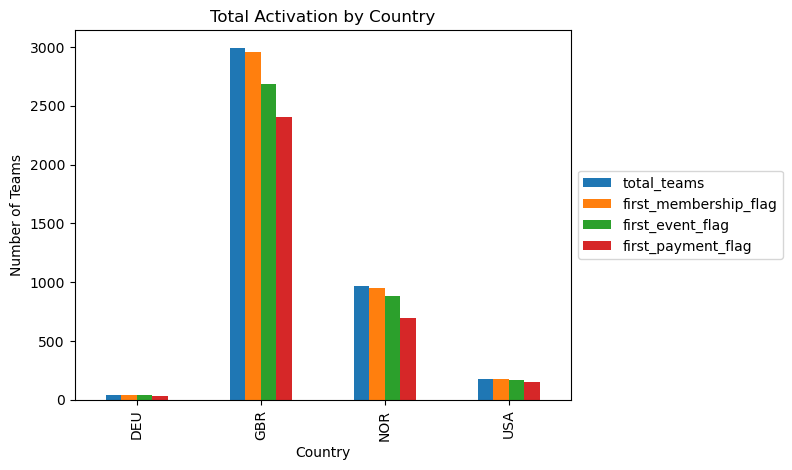

In [40]:
ax = activation_by_country.plot.bar(
    title='Total Activation by Country',
    x='country_code',
    xlabel='Country',
    ylabel='Number of Teams')
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [41]:
activation_by_country

,country_code,total_teams,first_membership_flag,first_event_flag,first_payment_flag
0,DEU,40,40,36,29
1,GBR,2993,2954,2684,2408
2,NOR,969,950,883,696
3,USA,180,179,169,150


In [42]:
activation_by_country_pct = activation_by_country.copy(deep=True)
for name in ['membership', 'event', 'payment']:
    activation_by_country_pct[f'first_{name}_pct'] = (
        activation_by_country_pct[f'first_{name}_flag'] /
        activation_by_country_pct['total_teams']
    )
    activation_by_country_pct.drop(
        columns=f'first_{name}_flag',
        inplace=True
    )
activation_by_country_pct.drop(
    columns = 'total_teams',
    inplace=True
)

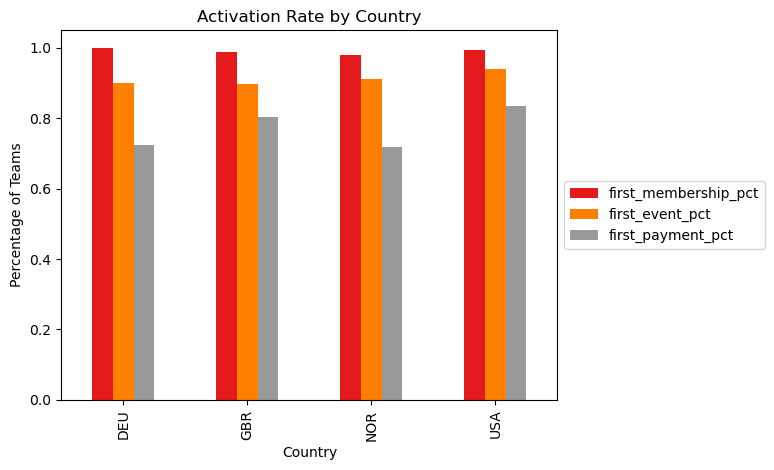

In [43]:
ax = activation_by_country_pct.plot.bar(
    title='Activation Rate by Country',
    x='country_code',
    colormap='Set1',
    xlabel='Country',
    ylabel='Percentage of Teams'
)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

### Weekly Retention

#### What percentage of users present in next week?

Why I chose it: Shows how effective we are in retaining teams for scheduling events week over week

How it’s computed: Calculates if a week has any events in the next week using a join, and flags those present in both as a retained. Then divides the number of teams that have an event next week by the number of teams in the current week


Any assumptions: None

In [44]:
# Merge to find returning teams
retention = pd.merge(
    team_week.loc[team_week.num_events>0].assign(next_week=lambda x: x['week'] + pd.Timedelta(weeks=1)),
    team_week.loc[team_week.num_events>0][['team_id', 'week']].rename(columns={'week': 'next_week'}),
    on=['team_id', 'next_week'],
    how='left',
    indicator=True
)

In [45]:
# Add retention flags
retention['retained'] = retention['_merge'] == 'both'
retention.drop(columns='_merge', inplace=True)

In [46]:
# Weekly retention rate (removing last item with no matches)
weekly_retention = retention.groupby('week').agg(
    teams_in_week=('team_id', 'nunique'),
    teams_retained_next_week=('retained', 'sum'),
).assign(retention_rate=lambda x: x['teams_retained_next_week'] / x['teams_in_week']).reset_index().iloc[:-1]

In [47]:
weekly_retention

,week,teams_in_week,teams_retained_next_week,retention_rate
0,2024-01-01,13,12,0.923077
1,2024-01-08,69,55,0.797101
2,2024-01-15,95,84,0.884211
3,2024-01-22,136,118,0.867647
4,2024-01-29,182,146,0.802198
5,2024-02-05,203,168,0.827586
6,2024-02-12,240,187,0.779167
7,2024-02-19,273,216,0.791209
8,2024-02-26,294,264,0.897959
9,2024-03-04,374,321,0.858289


<Axes: title={'center': 'Percentage of Teams Retained Weekly'}, xlabel='Week', ylabel='Percentage of Teams From Current Week'>

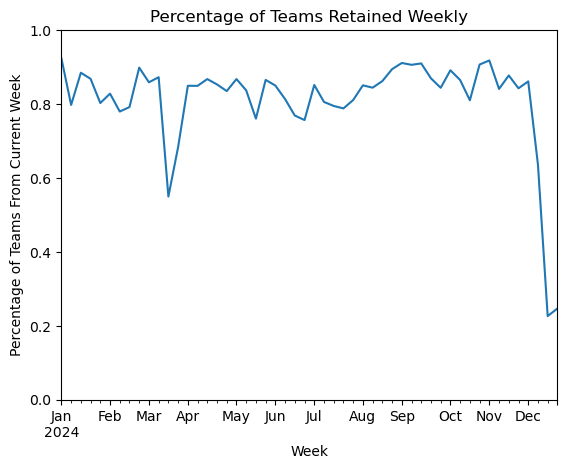

In [48]:
weekly_retention.plot.line(
    title='Percentage of Teams Retained Weekly',
    x='week',
    y='retention_rate',
    ylim=(0, 1),
    xlabel='Week',
    ylabel='Percentage of Teams From Current Week',
    legend=False
)


### Engagement Depth

#### How engaged have clubs been in the past 4 weeks?

Why I chose it: Shows our ability to keep clubs engaged with the application on a month to month basis

How it’s computed: Calculates number of weeks in the past 4 that have had an event, and maps it to a categorical value.


Any assumptions: Cutoffs for low, medium, high, and very high engagement are 1, 2, 3, and 4 for the past 4 weeks

In [49]:
# Test to make sure counts of weekly activity is accurate
assert all(weekly_team_event_activity.groupby('week').weekly_event_active_flag.sum().values[:-1] == weekly_retention.teams_in_week.values)

In [50]:
# Aggregate rolling scores
rolling_score_agged = weekly_team_event_activity.groupby(
    ['week', 'rolling_event_engagement_level']
    ).agg(
    team_count=('team_id', 'nunique')
    ).reset_index().pivot(
        index='week', columns='rolling_event_engagement_level', values='team_count'
    ).fillna(0)

<Axes: title={'center': 'Rolling Engagement Level Over Time'}, xlabel='Week', ylabel='Number of Teams'>

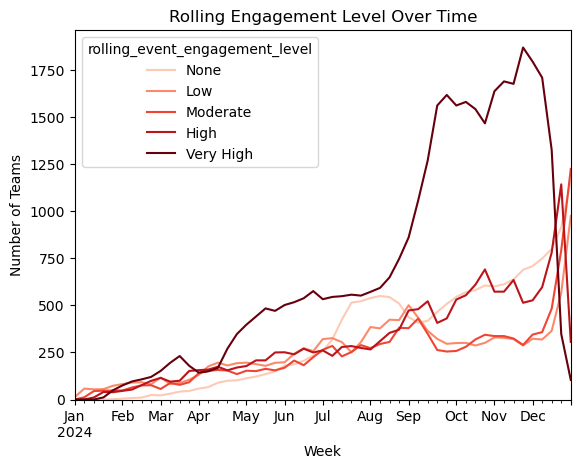

In [51]:
# Plot rolling engagement levels as line chart
rolling_score_agged.plot.line(
        colormap=truncate_colormap('Reds', 0.2),
        title='Rolling Engagement Level Over Time',
        xlabel='Week',
        ylabel='Number of Teams',
        ylim=(0,None))

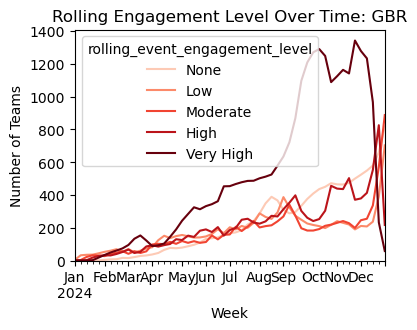

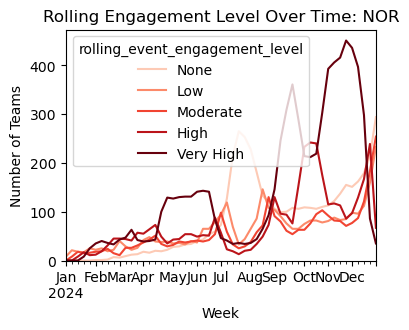

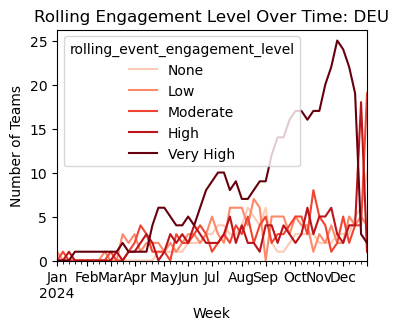

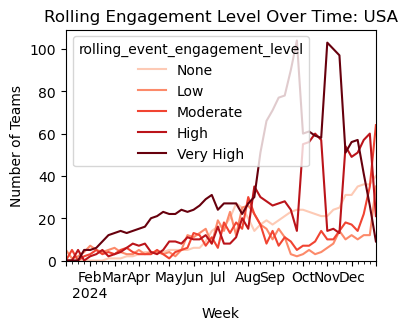

In [52]:
# Aggregate rolling scores by country
for country_code in teams.country_code.unique():
    weekly_team_event_activity.merge(
        teams,
        on='team_id',
        how='left'
    ).query(f"country_code == '{country_code}'").groupby(
        ['week', 'rolling_event_engagement_level']
    ).agg(
        team_count=('team_id', 'nunique')
    ).reset_index().pivot(
        index='week', columns='rolling_event_engagement_level', values='team_count'
    ).fillna(0).plot.line(
        colormap=truncate_colormap('Reds', 0.2),
        title=f'Rolling Engagement Level Over Time: {country_code}',
        xlabel='Week',
        ylabel='Number of Teams',
        ylim=(0,None),
        figsize=(4,3))

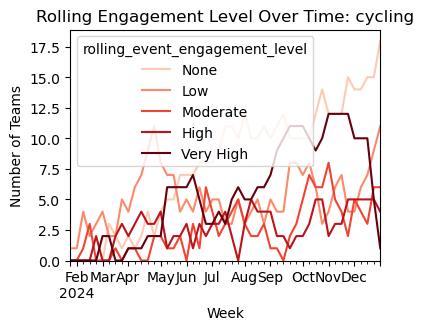

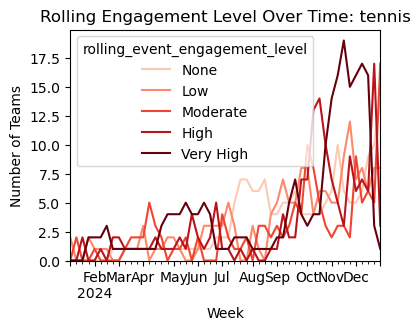

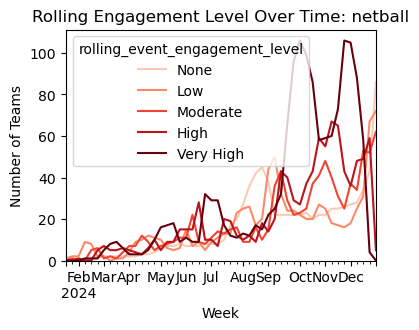

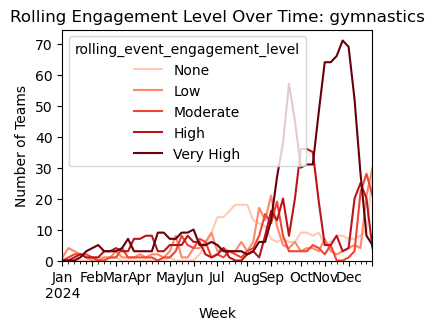

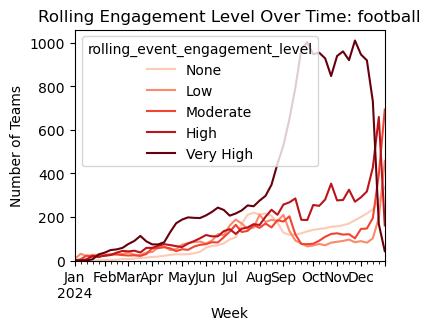

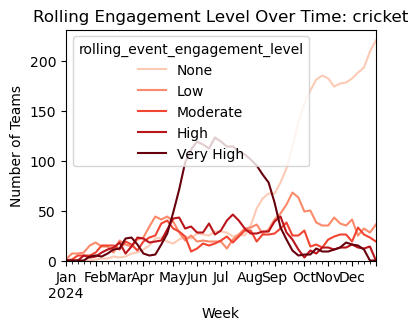

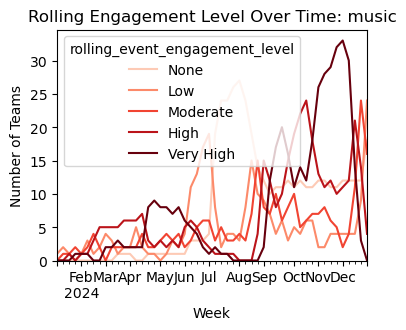

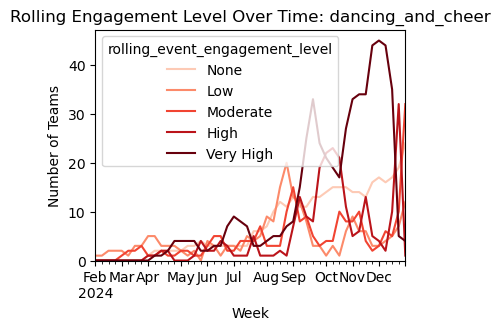

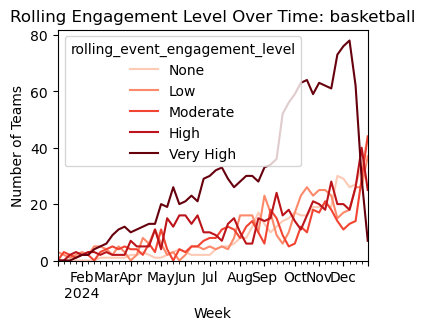

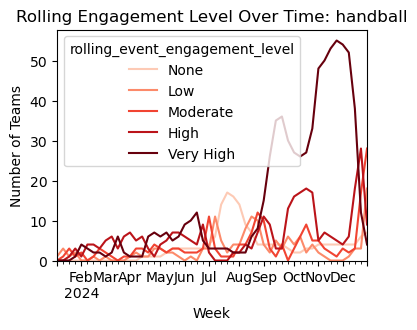

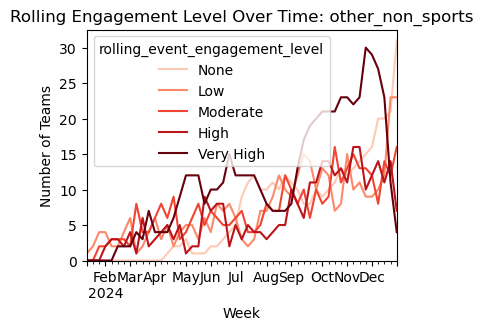

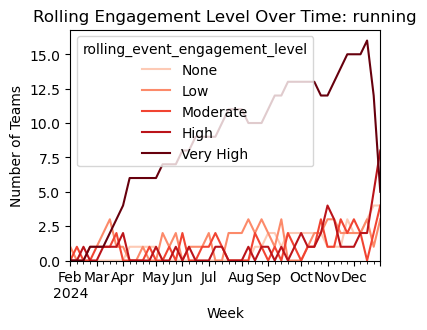

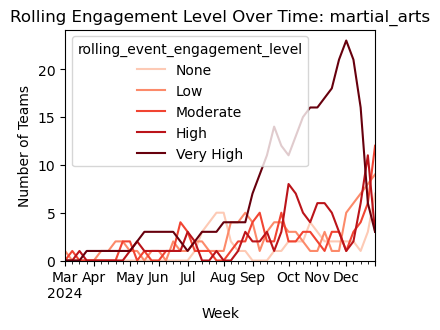

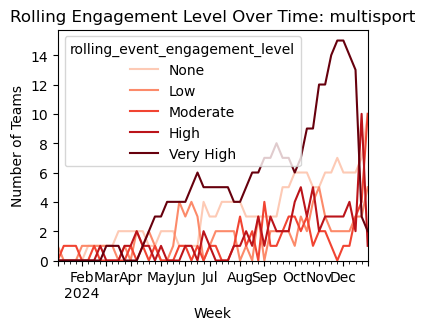

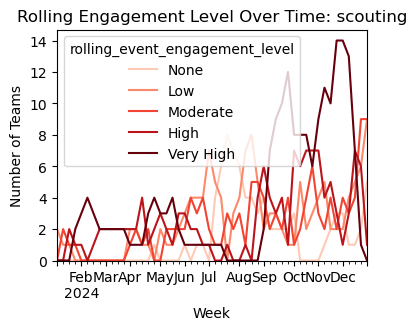

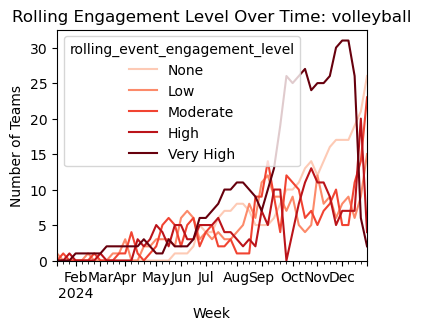

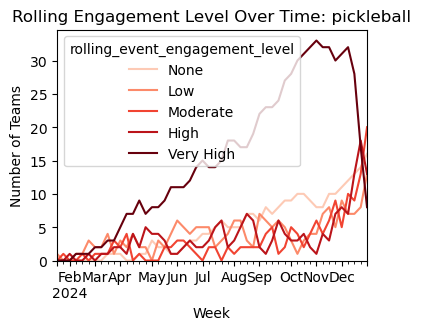

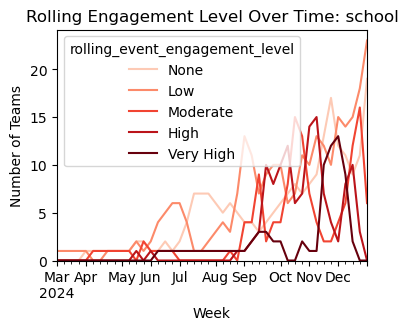

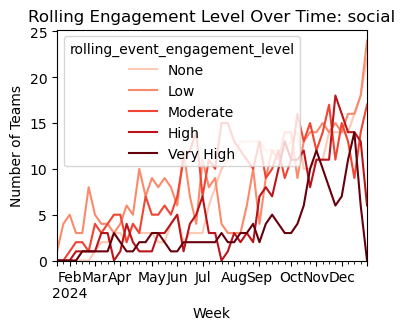

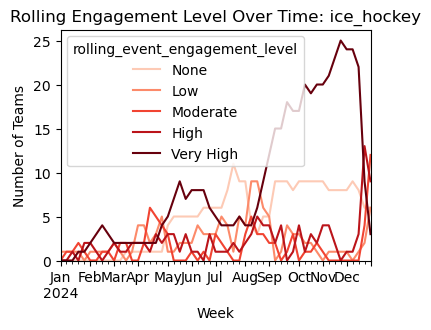

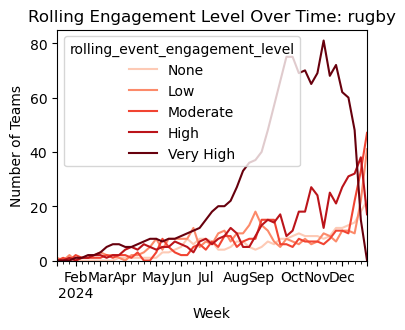

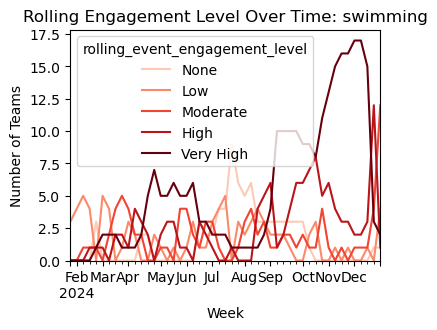

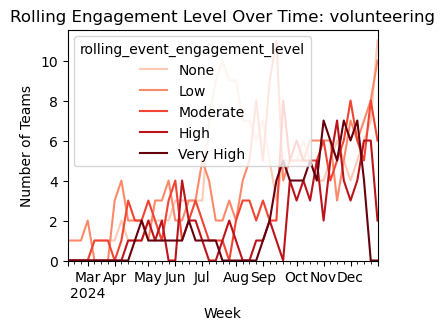

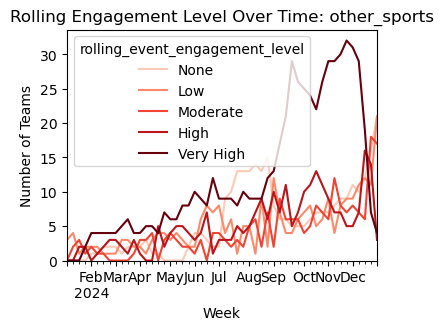

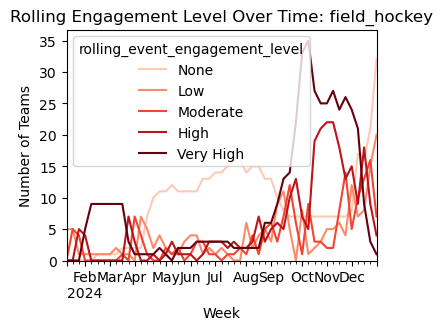

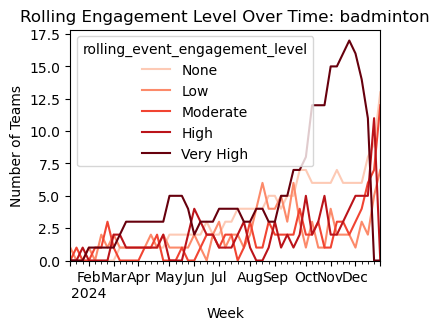

In [54]:
# Aggregate rolling scores by country
for team_activity in teams.team_activity.unique():
    if teams.team_activity.value_counts()[team_activity] > 20:
        weekly_team_event_activity.merge(
            teams,
            on='team_id',
            how='left'
        ).query(f"team_activity == '{team_activity}'").groupby(
            ['week', 'rolling_event_engagement_level']
        ).agg(
            team_count=('team_id', 'nunique')
        ).reset_index().pivot(
            index='week', columns='rolling_event_engagement_level', values='team_count'
        ).fillna(0).plot.line(
            colormap=truncate_colormap('Reds', 0.2),
            title=f'Rolling Engagement Level Over Time: {team_activity}',
            xlabel='Week',
            ylabel='Number of Teams',
            ylim=(0,None),
            figsize=(4,3))

Prioritize: Running, pickleball, ice hockey, rugby, football, backetball, handball, volleyball

De-emphasize: Padel, Cricket

In [55]:
# Get row-wise percentages of total
row_percent = rolling_score_agged.div(rolling_score_agged.sum(axis=1), axis=0) * 100

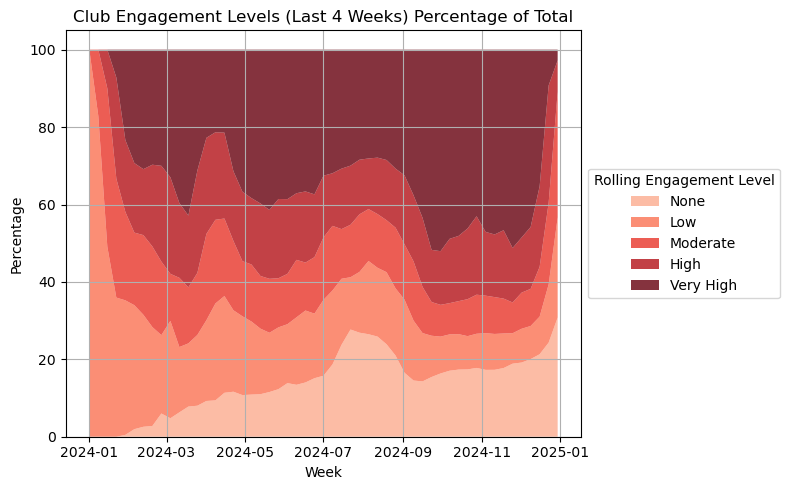

In [56]:
# Plot as stacked area chart
plt.figure(figsize=(8, 5))
plt.stackplot(row_percent.index, 
              row_percent.T,
              labels=row_percent.columns,
              alpha=0.8,
              colors=truncate_colormap('Reds', n=len(row_percent.columns), return_cmap=False))

plt.title('Club Engagement Levels (Last 4 Weeks) Percentage of Total')
plt.xlabel('Week')
plt.ylabel('Percentage')
plt.legend(loc='center left', title='Rolling Engagement Level', bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

#### How engaged have clubs been since they've been first activated?

Why I chose it: Shows our ability to keep clubs engaged with the application since their inception

How it’s computed: Calculates total weeks a club has been active, and then divides the cumulative number of weeks that it has had an event by that total.


Any assumptions: Cutoffs for low, medium, high, and very high engagement are 40, 60, 80, 100

In [57]:
# Create column for cummulative weeks active
weekly_team_activity_enhanced = weekly_team_event_activity.copy(deep=True)
weekly_team_activity_enhanced['total_event_active_weeks'] = weekly_team_activity_enhanced.groupby(['team_id'])['weekly_event_active_flag'].cumsum()

In [58]:
# Create column for weeks since week activate
cumulative_weekly_team_activity = pd.merge(
    weekly_team_activity_enhanced,
    weekly_team_activity_enhanced.groupby(['team_id']).week.min().rename('first_week'),
    left_on='team_id',
    right_index=True)

cumulative_weekly_team_activity['weeks_since_activation'] = ((cumulative_weekly_team_activity['week'] - cumulative_weekly_team_activity['first_week']).dt.days / 7) + 1
cumulative_weekly_team_activity.drop(columns='first_week', inplace=True)

In [59]:
# Create column for total activity percentage
cumulative_weekly_team_activity['total_engagement_percentage'] = (cumulative_weekly_team_activity['total_event_active_weeks'] / cumulative_weekly_team_activity['weeks_since_activation']) * 100


In [60]:
# Create Engagement Level Column from activity percentage
cumulative_weekly_team_activity['total_engagement_level'] = pd.cut(
    cumulative_weekly_team_activity['total_engagement_percentage'],
    bins=[0, 40, 60, 80, 100],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

In [61]:
# Aggregate rolling scores
total_score_agged = cumulative_weekly_team_activity.groupby(
    ['week', 'total_engagement_level']
    ).agg(
    team_count=('team_id', 'nunique')
    ).reset_index().pivot(
        index='week', columns='total_engagement_level', values='team_count'
    ).fillna(0)

<Axes: title={'center': 'Total Engagement Level Over Time'}, xlabel='Week', ylabel='Number of Teams'>

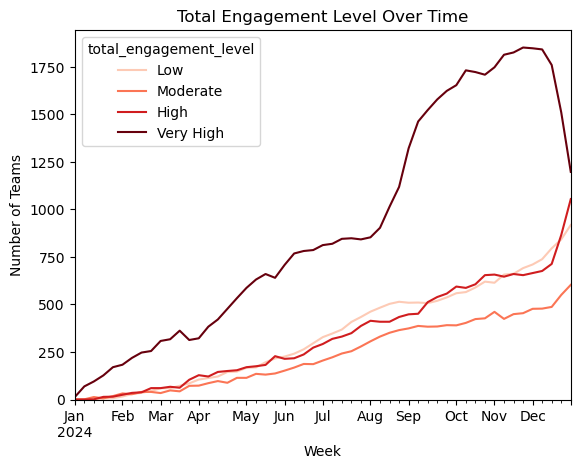

In [62]:
# Plot rolling engagement levels as line chart
total_score_agged.plot.line(
        colormap=truncate_colormap('Reds', 0.2),
        title='Total Engagement Level Over Time',
        xlabel='Week',
        ylabel='Number of Teams',
        ylim=(0,None))

In [63]:
# Get row-wise percentages of total
row_percent = total_score_agged.div(total_score_agged.sum(axis=1), axis=0) * 100

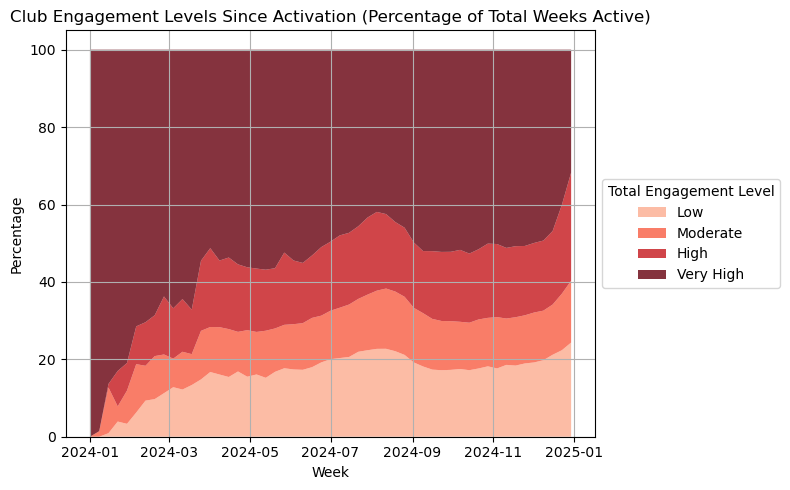

In [64]:
# Plot as stacked area chart
plt.figure(figsize=(8, 5))
plt.stackplot(row_percent.index, 
              row_percent.T,
              labels=row_percent.columns,
              alpha=0.8,
              colors=truncate_colormap('Reds', n=len(row_percent.columns), return_cmap=False))

plt.title('Club Engagement Levels Since Activation (Percentage of Total Weeks Active)')
plt.xlabel('Week')
plt.ylabel('Percentage')
plt.legend(loc='center left', title='Total Engagement Level', bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

### Monetization

#### High Level Metrics

In [65]:
# Percentage of teams with events that have used spond for payments at least once
teams_activation.loc[teams_activation.first_event_flag].first_payment_flag.sum()/ teams_activation.loc[teams_activation.first_event_flag].first_payment_flag.count()


0.8035524920466596

In [66]:
# Payment activation, clubs activated, and total revenue by country
conversion_rate_country = (teams_activation.loc[teams_activation.first_event_flag].groupby('country_code').first_payment_flag.sum() / teams_activation.loc[teams_activation.first_event_flag].groupby('country_code').first_payment_flag.count()).rename('payment_activation_rate')
country_conversion_final = pd.merge(
    conversion_rate_country,
    teams_activation.loc[teams_activation.first_event_flag].groupby('country_code').first_payment_flag.count().rename('total_activated_clubs'),
    left_index=True,
    right_index=True
).reset_index().merge(
    payments_enriched.groupby(['country_code']).spond_revenue.sum().reset_index(),
    how='left',
    on='country_code'
)
country_conversion_final

,country_code,payment_activation_rate,total_activated_clubs,spond_revenue
0,DEU,0.750000,36,8566.422708
1,GBR,0.826379,2684,697976.768268
2,NOR,0.730464,883,226552.171405
3,USA,0.834320,169,85909.540841


In [67]:
# Payment activation, clubs activated, and total revenue by activity type
conversion_rate_activity = (teams_activation.loc[teams_activation.first_event_flag].groupby('team_activity').first_payment_flag.sum() / teams_activation.loc[teams_activation.first_event_flag].groupby('team_activity').first_payment_flag.count()).rename('payment_activation_rate')
activity_conversion_final = pd.merge(
    conversion_rate_activity,
    teams_activation.loc[teams_activation.first_event_flag].groupby('team_activity').first_payment_flag.count().rename('total_activated_clubs'),
    left_index=True,
    right_index=True
).reset_index().merge(
    payments_enriched.groupby(['team_activity']).spond_revenue.sum().reset_index(),
    how='left',
    on='team_activity'
).sort_values('total_activated_clubs', ascending=False)
activity_conversion_final

,team_activity,payment_activation_rate,total_activated_clubs,spond_revenue
21,football,0.785588,1693,358792.422798
11,cricket,0.800000,275,81870.265164
33,netball,0.857778,225,72278.572923
6,basketball,0.891720,157,81060.587331
41,rugby,0.755906,127,29580.195370
24,gymnastics,0.712644,87,30161.106534
35,other_non_sports,0.802469,81,22652.593844
13,dancing_and_cheer,0.835616,73,20347.465327
38,pickleball,0.785714,70,33891.035649
54,volleyball,0.928571,70,16516.910018


#### Compare teams with events to teams with payment that week



Why I chose it: Shows on any given week how many teams are using spond to process payments vs just using it for the event scheduling. Displays how well we access revenue at a weekly level.


How it’s computed: Joins weekly club event activity and weekly club payment activity, and sums both by the week.


Any assumptions: Looks at all clubs in the week, not just those that had events. Some teams may have a payment with no event, some may have an event with now payment. It is calculated on all teams and shows how much of our user base we capture at any given time

In [68]:
# Get all teams with events and/or payments
payments_active_by_team_week = weekly_team_event_activity[['week', 'team_id', 'weekly_event_active_flag']].copy(deep=True).merge(
    weekly_team_payment_activity.drop(columns='rolling_payment_active_weeks'),
    on=['week', 'team_id'],
    how='outer'
).fillna(0)

In [69]:
payments_active_by_team_week

,week,team_id,weekly_event_active_flag,weekly_payment_active_flag
0,2024-09-30,0006D1A3C276485EAA26D1736F78193D,1.0,1.0
1,2024-10-07,0006D1A3C276485EAA26D1736F78193D,0.0,0.0
2,2024-10-14,0006D1A3C276485EAA26D1736F78193D,1.0,0.0
3,2024-10-21,0006D1A3C276485EAA26D1736F78193D,1.0,1.0
4,2024-10-28,0006D1A3C276485EAA26D1736F78193D,1.0,0.0
...,...,...,...,...
104433,2024-09-09,FECAC75B36744CC48BD86EC2F16C27F7,0.0,1.0
104434,2024-11-18,FEEEFB3CD7FA4E378A72E363AADFFE26,0.0,1.0
104435,2024-04-22,FF4173C2DC0345B5A9A04EE99644C09E,0.0,1.0
104436,2024-04-29,FF4173C2DC0345B5A9A04EE99644C09E,0.0,1.0


<Axes: title={'center': 'Weekly Number of Teams with Events vs Payments'}, xlabel='Week', ylabel='Number of Teams'>

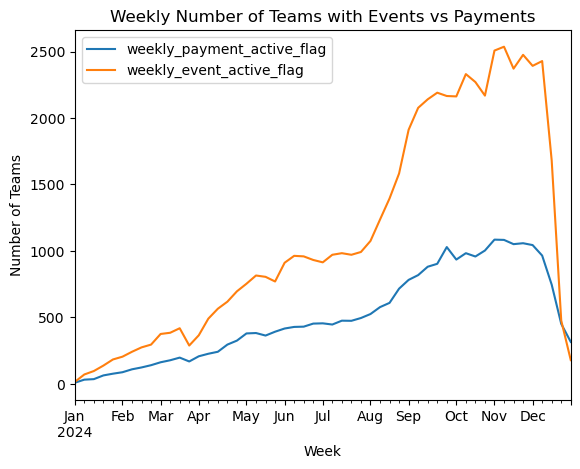

In [70]:
# Show weekly active teams vs teams processing payments weekly
payments_active_by_team_week.groupby('week')[['weekly_payment_active_flag', 'weekly_event_active_flag']].sum().plot(
    title = 'Weekly Number of Teams with Events vs Payments',
    xlabel='Week',
    ylabel='Number of Teams'
)

Finding: Wide gap between clubs who had an event in a week vs clubs that processed a payment in that week

#### Of teams with events in in the past 4 weeks, how many used payments?



Why I chose it: Expands the prior metric by showing the funnel of likelihood for a team with an event to have any payments in that period

How it’s computed: Combines the weekly activity data for events and payments, filters where teams had events, and counts the number of teams with and without payments


Any assumptions: Only focuses on clubs with events in the last four weeks, assumes that window is wide enough

In [71]:
weekly_team_event_activity

,team_id,week,weekly_event_active_flag,rolling_event_active_weeks,rolling_event_engagement_level
0,0006D1A3C276485EAA26D1736F78193D,2024-09-30,1.0,1.0,Low
1,0006D1A3C276485EAA26D1736F78193D,2024-10-07,0.0,1.0,Low
2,0006D1A3C276485EAA26D1736F78193D,2024-10-14,1.0,2.0,Moderate
3,0006D1A3C276485EAA26D1736F78193D,2024-10-21,1.0,3.0,High
4,0006D1A3C276485EAA26D1736F78193D,2024-10-28,1.0,3.0,High
...,...,...,...,...,...
96643,FFE377B6793E4969A8D78670666B6BBD,2024-12-02,1.0,3.0,High
96644,FFE377B6793E4969A8D78670666B6BBD,2024-12-09,0.0,3.0,High
96645,FFE377B6793E4969A8D78670666B6BBD,2024-12-16,0.0,2.0,Moderate
96646,FFE377B6793E4969A8D78670666B6BBD,2024-12-23,0.0,1.0,Low


In [72]:
rolling_payments = weekly_team_payment_activity.assign(payment_in_window=lambda x: (x['rolling_payment_active_weeks']>0).astype(int))[['team_id', 'week', 'payment_in_window']]
rolling_events = weekly_team_event_activity.assign(event_in_window=lambda x: (x['rolling_event_active_weeks']>0).astype(int))[['team_id', 'week', 'event_in_window']]

In [73]:
rolling_events_payments_merged = pd.merge(
    rolling_events,
    rolling_payments,
    how='left',
    left_on=['team_id', 'week'],
    right_on=['team_id', 'week']
).reset_index().fillna(0)

In [74]:
assert all(rolling_score_agged.drop(columns='None').sum(axis=1).values == rolling_events_payments_merged.groupby('week').event_in_window.sum().values)

In [75]:
rolling_payments_where_events = rolling_events_payments_merged.loc[rolling_events_payments_merged['event_in_window']>0].fillna(0)

In [76]:
rolling_payments_agged = rolling_payments_where_events.groupby(['week', 'payment_in_window']).team_id.count().rename('total_clubs').unstack().fillna(0)

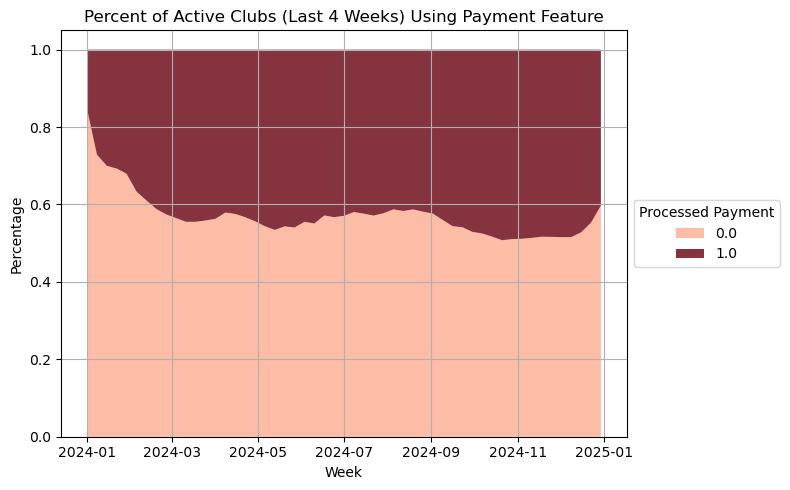

In [77]:
rolling_payments_by_week_pct = rolling_payments_agged.div(rolling_payments_agged.sum(axis=1), axis=0)

# Plot as stacked area chart
plt.figure(figsize=(8, 5))
plt.stackplot(rolling_payments_by_week_pct.index, 
              rolling_payments_by_week_pct.T,
              labels=rolling_payments_by_week_pct.columns,
              alpha=0.8,
              colors=truncate_colormap('Reds', n=len(rolling_payments_by_week_pct.columns), return_cmap=False))

plt.title('Percent of Active Clubs (Last 4 Weeks) Using Payment Feature')
plt.xlabel('Week')
plt.ylabel('Percentage')
plt.legend(loc='center left', title='Processed Payment', bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

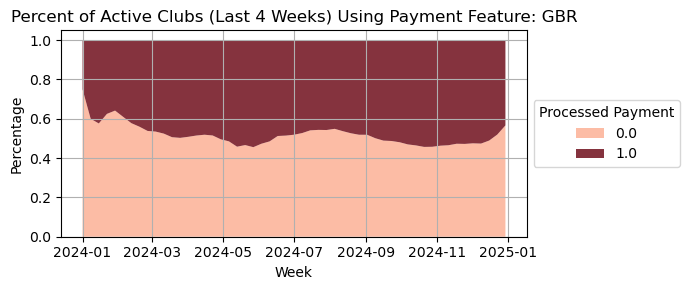

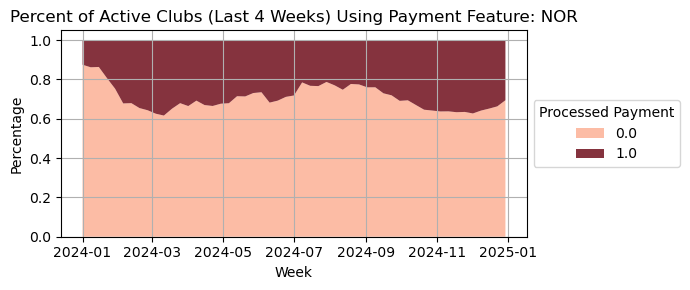

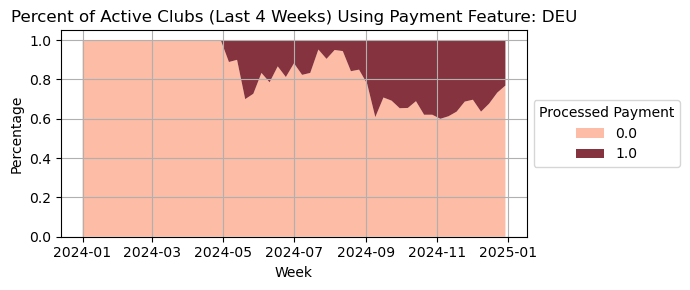

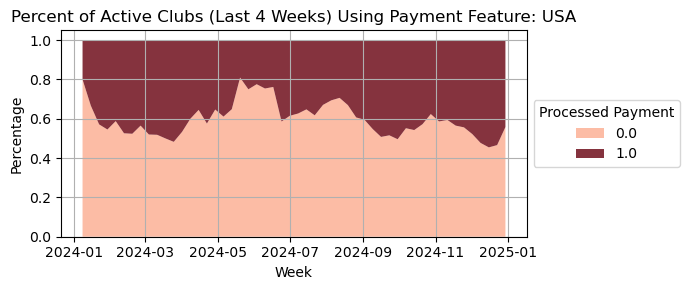

In [78]:
for country_code in teams.country_code.unique():
    rolling_by_country = rolling_events_payments_merged.merge(
        teams, on='team_id'
    ).query(f"country_code == '{country_code}'").query('event_in_window>0').fillna(0).groupby(
        ['week', 'payment_in_window']
    ).team_id.count().rename('total_clubs').unstack().fillna(0)
    rolling_by_country_pct = rolling_by_country.div(rolling_by_country.sum(axis=1), axis=0)

    # Plot as stacked area chart
    plt.figure(figsize=(7, 3))
    plt.stackplot(
        rolling_by_country_pct.index, 
        rolling_by_country_pct.T,
        labels=rolling_by_country_pct.columns,
        alpha=0.8,
        colors=truncate_colormap('Reds', n=len(rolling_by_country_pct.columns), return_cmap=False))

    plt.title(f'Percent of Active Clubs (Last 4 Weeks) Using Payment Feature: {country_code}')
    plt.xlabel('Week')
    plt.ylabel('Percentage')
    plt.legend(loc='center left', title='Processed Payment', bbox_to_anchor=(1,0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

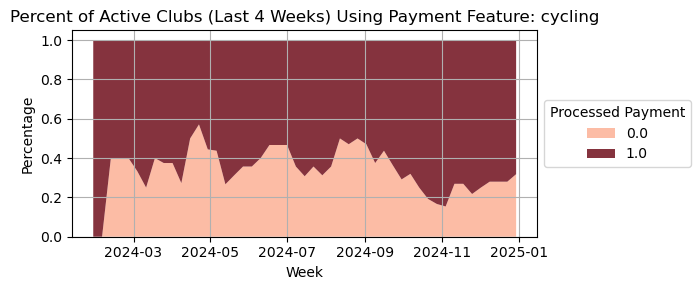

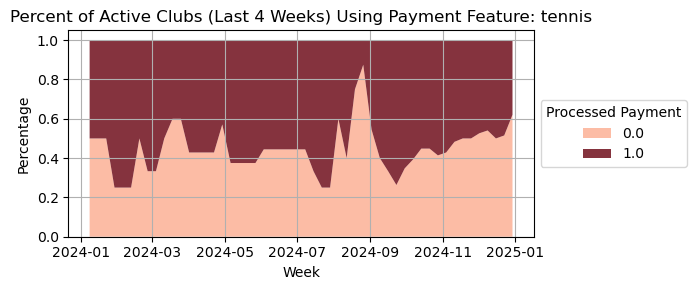

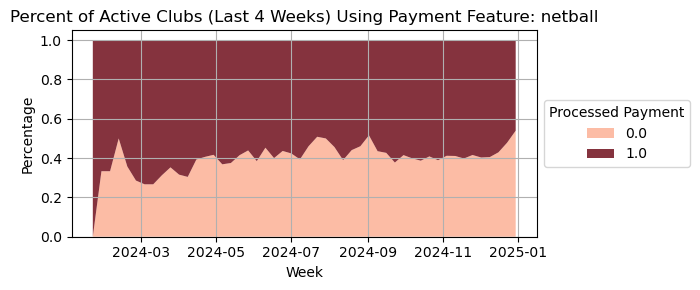

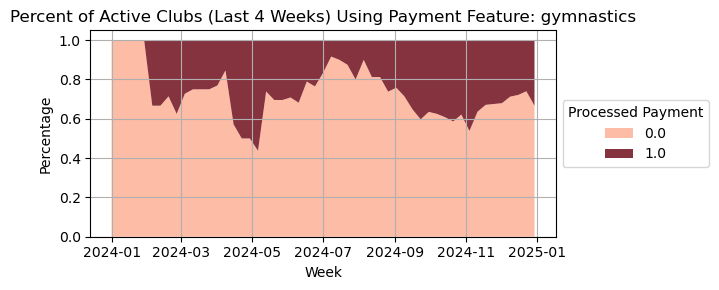

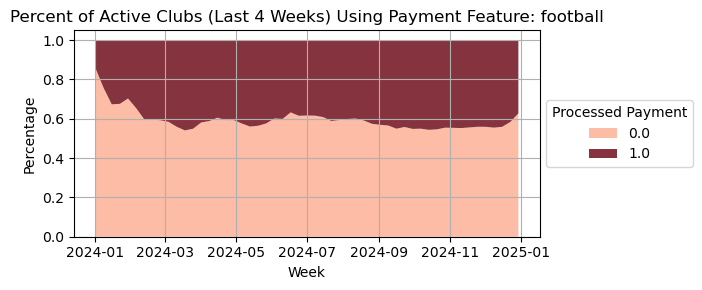

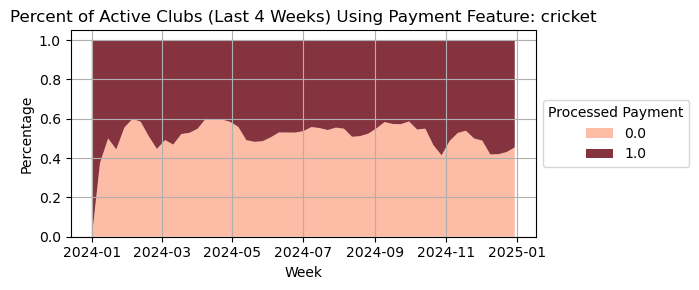

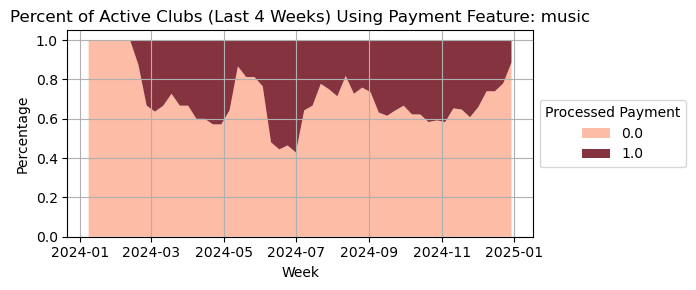

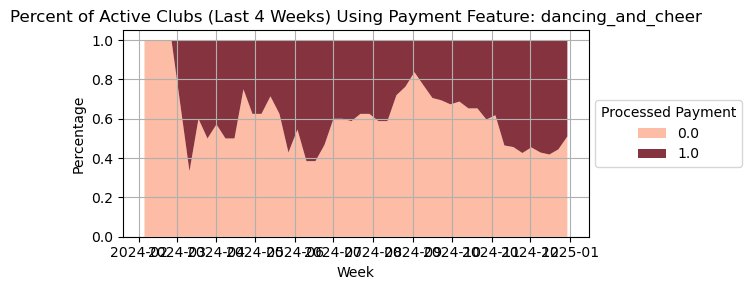

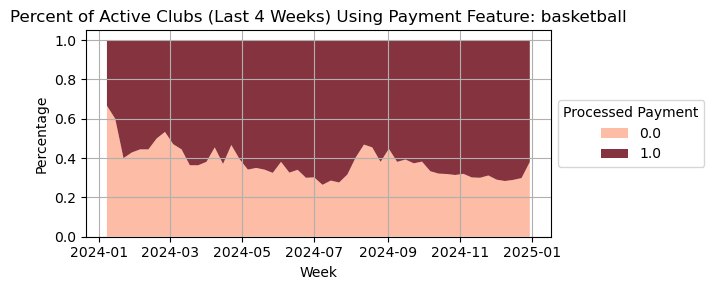

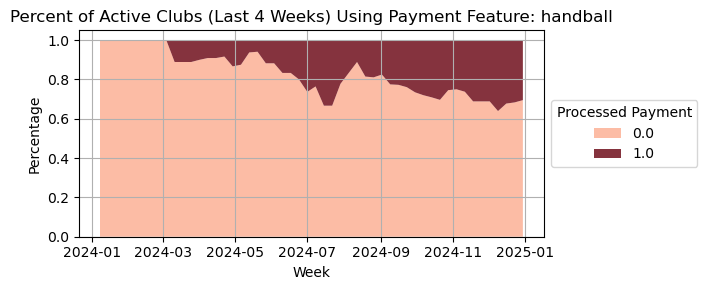

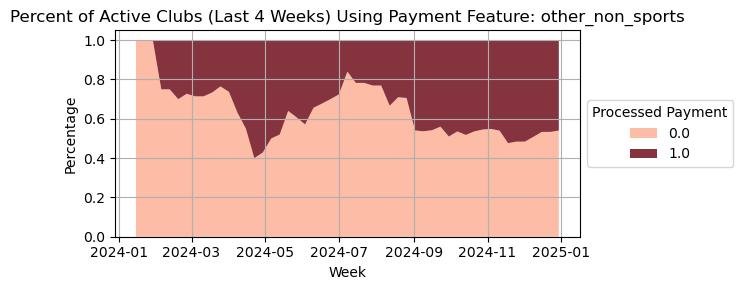

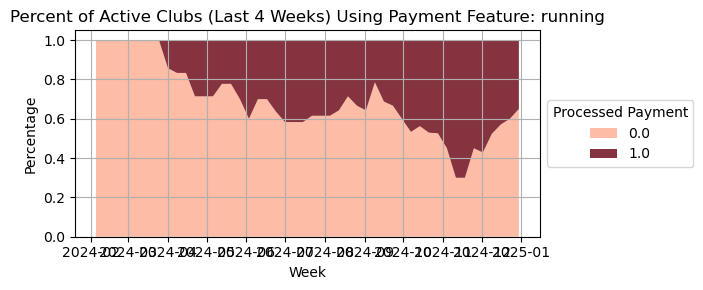

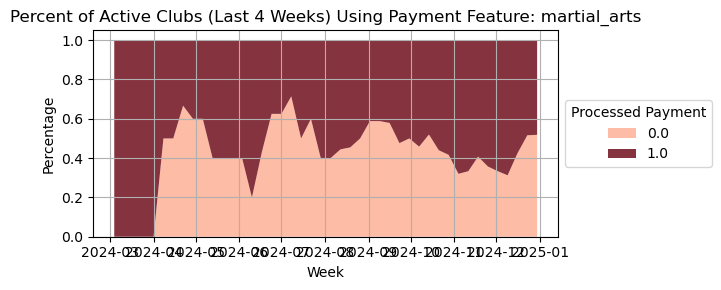

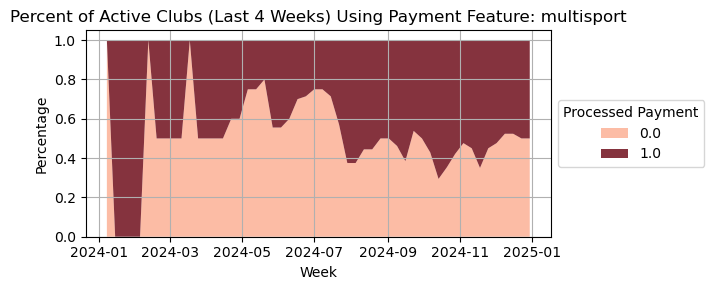

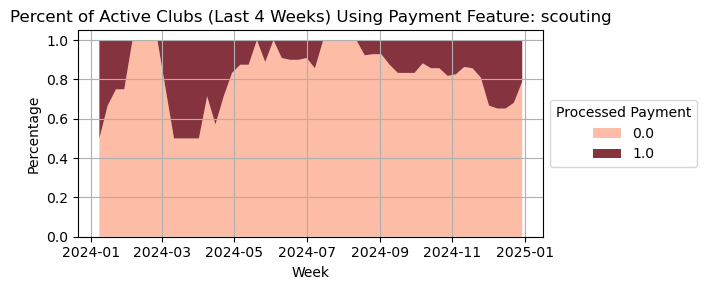

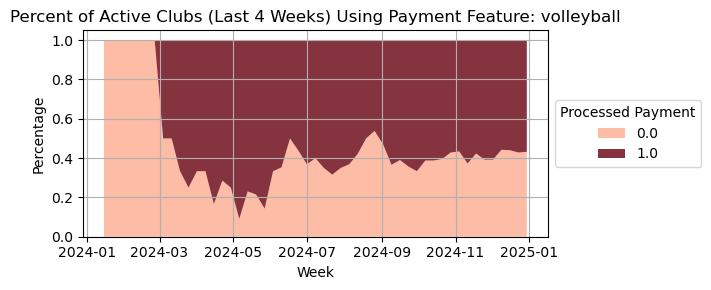

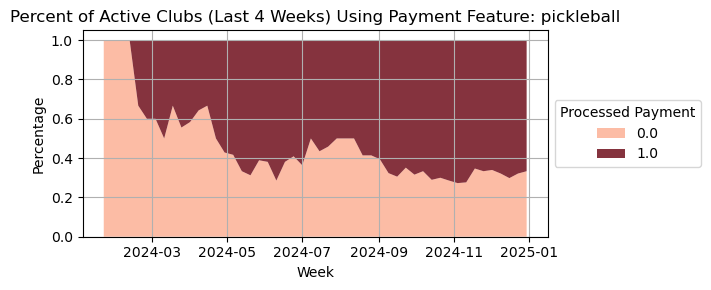

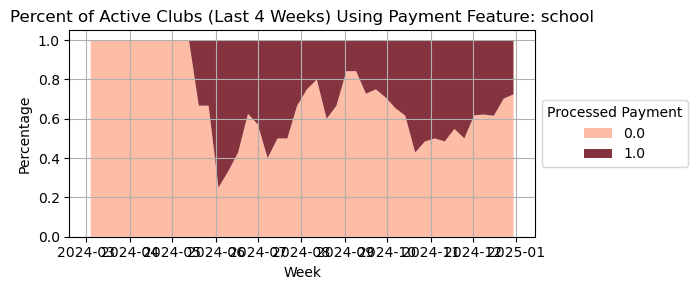

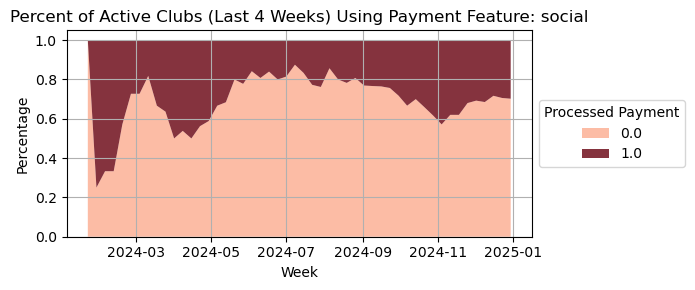

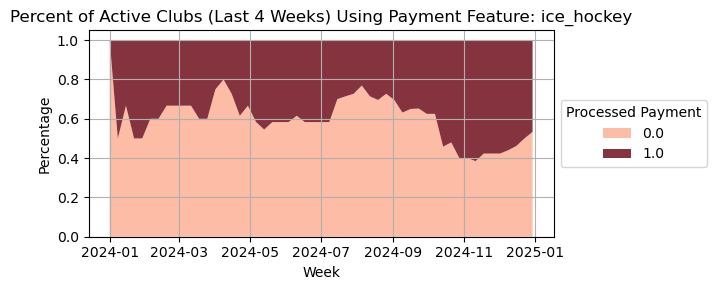

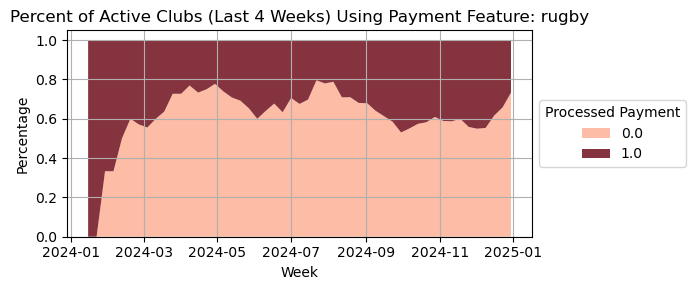

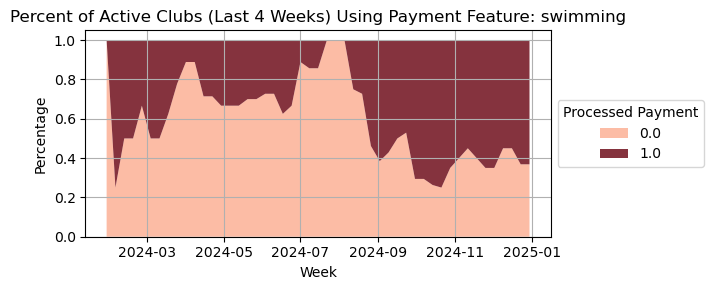

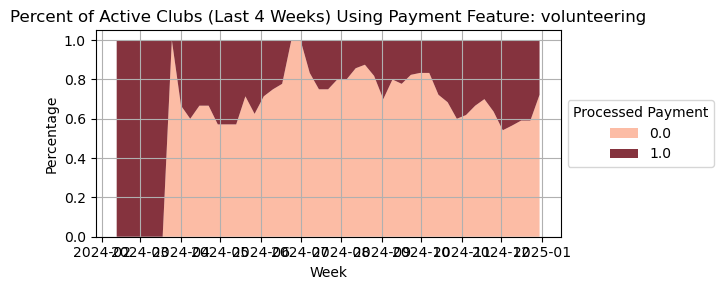

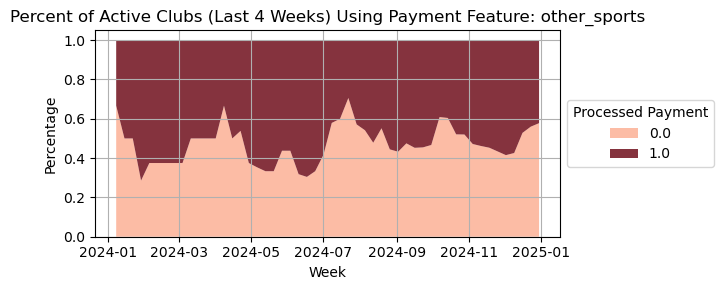

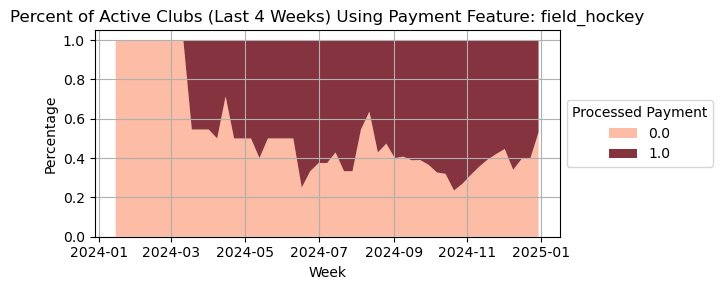

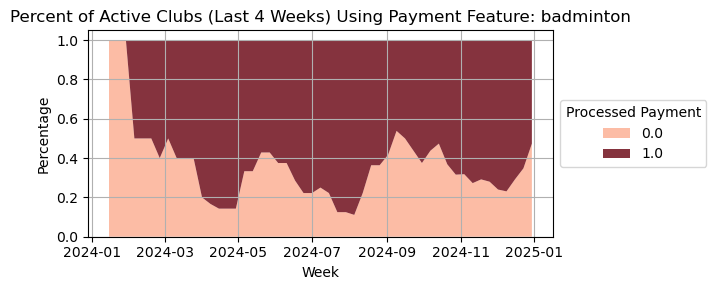

In [79]:
for team_activity in teams.team_activity.unique():
    if teams.team_activity.value_counts()[team_activity] > 20:
        rolling_by_activity = rolling_events_payments_merged.merge(
            teams, on='team_id'
        ).query(f"team_activity == '{team_activity}'").query('event_in_window>0').fillna(0).groupby(
            ['week', 'payment_in_window']
        ).team_id.count().rename('total_clubs').unstack().fillna(0)
        rolling_by_activity_pct = rolling_by_activity.div(rolling_by_activity.sum(axis=1), axis=0)

        # Plot as stacked area chart
        plt.figure(figsize=(7, 3))
        plt.stackplot(
            rolling_by_activity_pct.index, 
            rolling_by_activity_pct.T,
            labels=rolling_by_activity_pct.columns,
            alpha=0.8,
            colors=truncate_colormap('Reds', n=len(rolling_by_activity_pct.columns), return_cmap=False))

        plt.title(f'Percent of Active Clubs (Last 4 Weeks) Using Payment Feature: {team_activity}')
        plt.xlabel('Week')
        plt.ylabel('Percentage')
        plt.legend(loc='center left', title='Processed Payment', bbox_to_anchor=(1,0.5))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Most consistent payment rate: Basketball, Netball, Badminton, Pickleball, Volleyball

#### How much revenue do we get from teams that monetize on average?

Why I chose it: Shows market penetration over time, and our ability to keep customers using Spond for processing payments

How it’s computed: Calculates revenue by week and payments by week to calculate average revenue per paying club


Any assumptions: None

In [80]:
payments_active_by_team_week

,week,team_id,weekly_event_active_flag,weekly_payment_active_flag
0,2024-09-30,0006D1A3C276485EAA26D1736F78193D,1.0,1.0
1,2024-10-07,0006D1A3C276485EAA26D1736F78193D,0.0,0.0
2,2024-10-14,0006D1A3C276485EAA26D1736F78193D,1.0,0.0
3,2024-10-21,0006D1A3C276485EAA26D1736F78193D,1.0,1.0
4,2024-10-28,0006D1A3C276485EAA26D1736F78193D,1.0,0.0
...,...,...,...,...
104433,2024-09-09,FECAC75B36744CC48BD86EC2F16C27F7,0.0,1.0
104434,2024-11-18,FEEEFB3CD7FA4E378A72E363AADFFE26,0.0,1.0
104435,2024-04-22,FF4173C2DC0345B5A9A04EE99644C09E,0.0,1.0
104436,2024-04-29,FF4173C2DC0345B5A9A04EE99644C09E,0.0,1.0


In [81]:
revenue_by_team_week = payments_active_by_team_week.loc[payments_active_by_team_week.weekly_payment_active_flag>0].merge(
    payments_enriched.groupby(['team_id', 'week']).spond_revenue.sum().reset_index(),
    on = ['team_id', 'week'],
    how='left'
).fillna(0)


In [82]:
revenue_by_week = revenue_by_team_week.groupby('week')[
    ['weekly_payment_active_flag', 'spond_revenue']
].sum().assign(
    revenue_per_paying_club = lambda x: x['spond_revenue'] / x['weekly_payment_active_flag']
)

<Axes: title={'center': 'Weekly Revenue Per Paying Club'}, xlabel='Week', ylabel='NOK'>

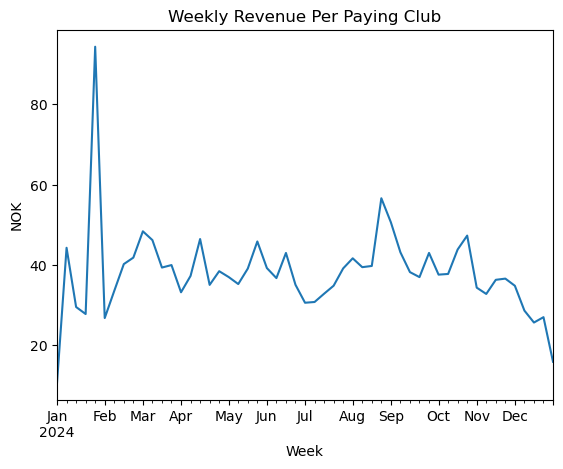

In [83]:
revenue_by_week['revenue_per_paying_club'].plot(
    title='Weekly Revenue Per Paying Club',
    xlabel='Week',
    ylabel='NOK'
)